# 통계분석 포트폴리오

## 프로젝트 개요
다양한 통계 기법을 활용한 데이터 분석 프로젝트입니다.

## 분석 내용
1. 기술통계 및 탐색적 데이터 분석
2. 가설검정 (t-검정, ANOVA)
3. 상관분석 및 회귀분석
4. 시계열 분석
5. 비모수 검정

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, f_oneway, pearsonr, spearmanr, mannwhitneyu
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
import os
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (최종 강화 버전)
def set_korean_font():
    """한글 폰트를 설정하는 함수 - 폰트 캐시 재구성 및 직접 로드"""
    # 1단계: 폰트 캐시 재구성 (먼저 실행)
    try:
        import matplotlib
        cache_dir = matplotlib.get_cachedir()
        # 폰트 캐시 파일 삭제
        for file in os.listdir(cache_dir):
            if file.startswith('fontlist'):
                try:
                    os.remove(os.path.join(cache_dir, file))
                except:
                    pass
        # 폰트 캐시 재구성
        fm._rebuild()
        print("폰트 캐시 재구성 완료")
    except Exception as e:
        print(f"폰트 캐시 재구성 중 오류: {e}")
    
    # Windows 폰트 경로 (확장자 포함)
    font_paths = [
        'C:/Windows/Fonts/malgun.ttf',  # 맑은 고딕
        'C:/Windows/Fonts/malgunbd.ttf',  # 맑은 고딕 Bold
        'C:/Windows/Fonts/gulim.ttc',    # 굴림
        'C:/Windows/Fonts/gulimche.ttf',  # 굴림체
        'C:/Windows/Fonts/NanumGothic.ttf',  # 나눔고딕
        'C:/Windows/Fonts/NanumGothicLight.ttf',
        'C:/Windows/Fonts/batang.ttc',  # 바탕
        'C:/Windows/Fonts/batangche.ttf',  # 바탕체
    ]
    
    # 폰트 이름 목록 (우선순위 순)
    font_names = ['Malgun Gothic', '맑은 고딕', 'Gulim', '굴림', 'NanumGothic', '나눔고딕', 'Batang', '바탕']
    
    # 2단계: 폰트 경로로 직접 로드 시도
    font_prop = None
    selected_font_path = None
    
    for font_path in font_paths:
        if os.path.exists(font_path):
            try:
                # 폰트 직접 로드
                font_prop = fm.FontProperties(fname=font_path)
                font_name = font_prop.get_name()
                
                # matplotlib에 폰트 등록
                fm.fontManager.addfont(font_path)
                
                # rcParams 설정
                plt.rcParams['font.family'] = font_name
                plt.rcParams['font.sans-serif'] = [font_name] + plt.rcParams['font.sans-serif']
                
                selected_font_path = font_path
                print(f"✅ 한글 폰트 설정 완료: {font_name}")
                print(f"   경로: {font_path}")
                
                # 테스트 출력
                test_fig, test_ax = plt.subplots(figsize=(1, 1))
                test_ax.text(0.5, 0.5, '한글테스트', fontsize=10, ha='center', va='center')
                test_ax.set_xlim(0, 1)
                test_ax.set_ylim(0, 1)
                plt.close(test_fig)
                
                break
            except Exception as e:
                print(f"폰트 로드 실패 ({font_path}): {e}")
                continue
    
    # 3단계: 폰트 경로로 찾지 못한 경우, 폰트 이름으로 찾기
    if font_prop is None:
        # 폰트 목록 다시 가져오기
        font_list = [f.name for f in fm.fontManager.ttflist]
        for font_name in font_names:
            if font_name in font_list:
                # 폰트 파일 경로 찾기
                font_file = None
                for f in fm.fontManager.ttflist:
                    if f.name == font_name:
                        font_file = f.fname
                        break
                
                if font_file and os.path.exists(font_file):
                    plt.rcParams['font.family'] = font_name
                    plt.rcParams['font.sans-serif'] = [font_name] + plt.rcParams['font.sans-serif']
                    selected_font_path = font_file
                    print(f"✅ 한글 폰트 설정 완료: {font_name}")
                    print(f"   경로: {font_file}")
                    break
    
    # 4단계: 최종 확인 및 설정
    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
    
    if selected_font_path:
        # 폰트가 제대로 설정되었는지 확인
        current_font = plt.rcParams['font.family']
        print(f"\n✅ 최종 설정된 폰트: {current_font}")
        if isinstance(current_font, list):
            current_font = current_font[0] if current_font else 'Unknown'
        print(f"   폰트 경로: {selected_font_path}")
    else:
        print("\n⚠️ 한글 폰트를 찾을 수 없습니다.")
        print("사용 가능한 한글 폰트 목록:")
        font_list = [f.name for f in fm.fontManager.ttflist]
        korean_fonts = [f for f in font_list if any(k in f for k in ['Gothic', 'Gulim', 'Nanum', 'Malgun', '맑은', '나눔', '굴림', 'Batang', '바탕'])]
        for f in sorted(set(korean_fonts))[:10]:
            print(f"  - {f}")
        print("\n기본 폰트를 사용합니다. 한글이 네모로 표시될 수 있습니다.")

# 한글 폰트 설정 실행
set_korean_font()

np.random.seed(42)
sns.set_style("whitegrid")
sns.set_palette("husl")

폰트 캐시 재구성 중 오류: module 'matplotlib.font_manager' has no attribute '_rebuild'
✅ 한글 폰트 설정 완료: Malgun Gothic
   경로: C:/Windows/Fonts/malgun.ttf

✅ 최종 설정된 폰트: ['Malgun Gothic']
   폰트 경로: C:/Windows/Fonts/malgun.ttf


## 1. 데이터 생성

실제 분석 시나리오를 시뮬레이션하기 위한 데이터를 생성합니다.

In [15]:
# 예시: 온라인 쇼핑몰 고객 데이터
np.random.seed(42)
n = 1000

# 데이터 생성
data = {
    'customer_id': range(1, n+1),
    'age': np.random.normal(35, 10, n).clip(18, 80),
    'annual_income': np.random.normal(50000, 15000, n).clip(20000, 150000),
    'spending': np.random.normal(2000, 500, n).clip(500, 5000),
    'visits_per_month': np.random.poisson(5, n),
    'satisfaction_score': np.random.normal(4.0, 0.8, n).clip(1, 5),
    'region': np.random.choice(['서울', '경기', '부산', '대구', '인천'], n),
    'membership_type': np.random.choice(['일반', '프리미엄', 'VIP'], n, p=[0.6, 0.3, 0.1])
}

df = pd.DataFrame(data)

# 소비와 소득 간 상관관계 추가
df['spending'] = df['annual_income'] * 0.03 + np.random.normal(0, 300, n)
df['spending'] = df['spending'].clip(500, 5000)

print(f"데이터 크기: {len(df)}행, {len(df.columns)}열")
df.head()

데이터 크기: 1000행, 8열


,customer_id,age,annual_income,spending,visits_per_month,satisfaction_score,region,membership_type
0,1,39.967142,70990.331549,2107.203833,6,3.551364,부산,일반
1,2,33.617357,63869.505244,1553.890758,3,3.577551,대구,VIP
2,3,41.476885,50894.455549,1324.892416,7,3.838319,서울,VIP
3,4,50.230299,40295.948334,2148.331415,4,5.000000,부산,VIP
4,5,32.658466,60473.349704,1992.131120,7,4.563173,인천,일반


## 2. 기술통계 및 탐색적 데이터 분석

In [16]:
# 기술통계
print("=== 기술통계 요약 ===")
numeric_cols = ['age', 'annual_income', 'spending', 'visits_per_month', 'satisfaction_score']
desc_stats = df[numeric_cols].describe()
print(desc_stats.round(2))

# 왜도와 첨도
print("\n=== 왜도 및 첨도 ===")
skewness = df[numeric_cols].skew()
kurtosis = df[numeric_cols].kurtosis()
skew_kurt = pd.DataFrame({
    '왜도': skewness,
    '첨도': kurtosis
})
print(skew_kurt.round(3))

=== 기술통계 요약 ===
           age  annual_income  spending  visits_per_month  satisfaction_score
count  1000.00        1000.00   1000.00           1000.00             1000.00
mean     35.32       51198.03   1538.09              4.92                3.97
std       9.52       14629.72    518.51              2.04                0.74
min      18.00       20000.00    500.00              0.00                1.51
25%      28.52       40906.37   1179.08              4.00                3.47
50%      35.25       50946.16   1522.68              5.00                4.03
75%      41.48       60933.23   1900.04              6.00                4.58
max      73.53       97896.61   3241.03             14.00                5.00

=== 왜도 및 첨도 ===
                       왜도     첨도
age                 0.279 -0.159
annual_income       0.091 -0.238
spending            0.147 -0.389
visits_per_month    0.335  0.193
satisfaction_score -0.474 -0.339


한글 폰트 설정 완료: Malgun Gothic


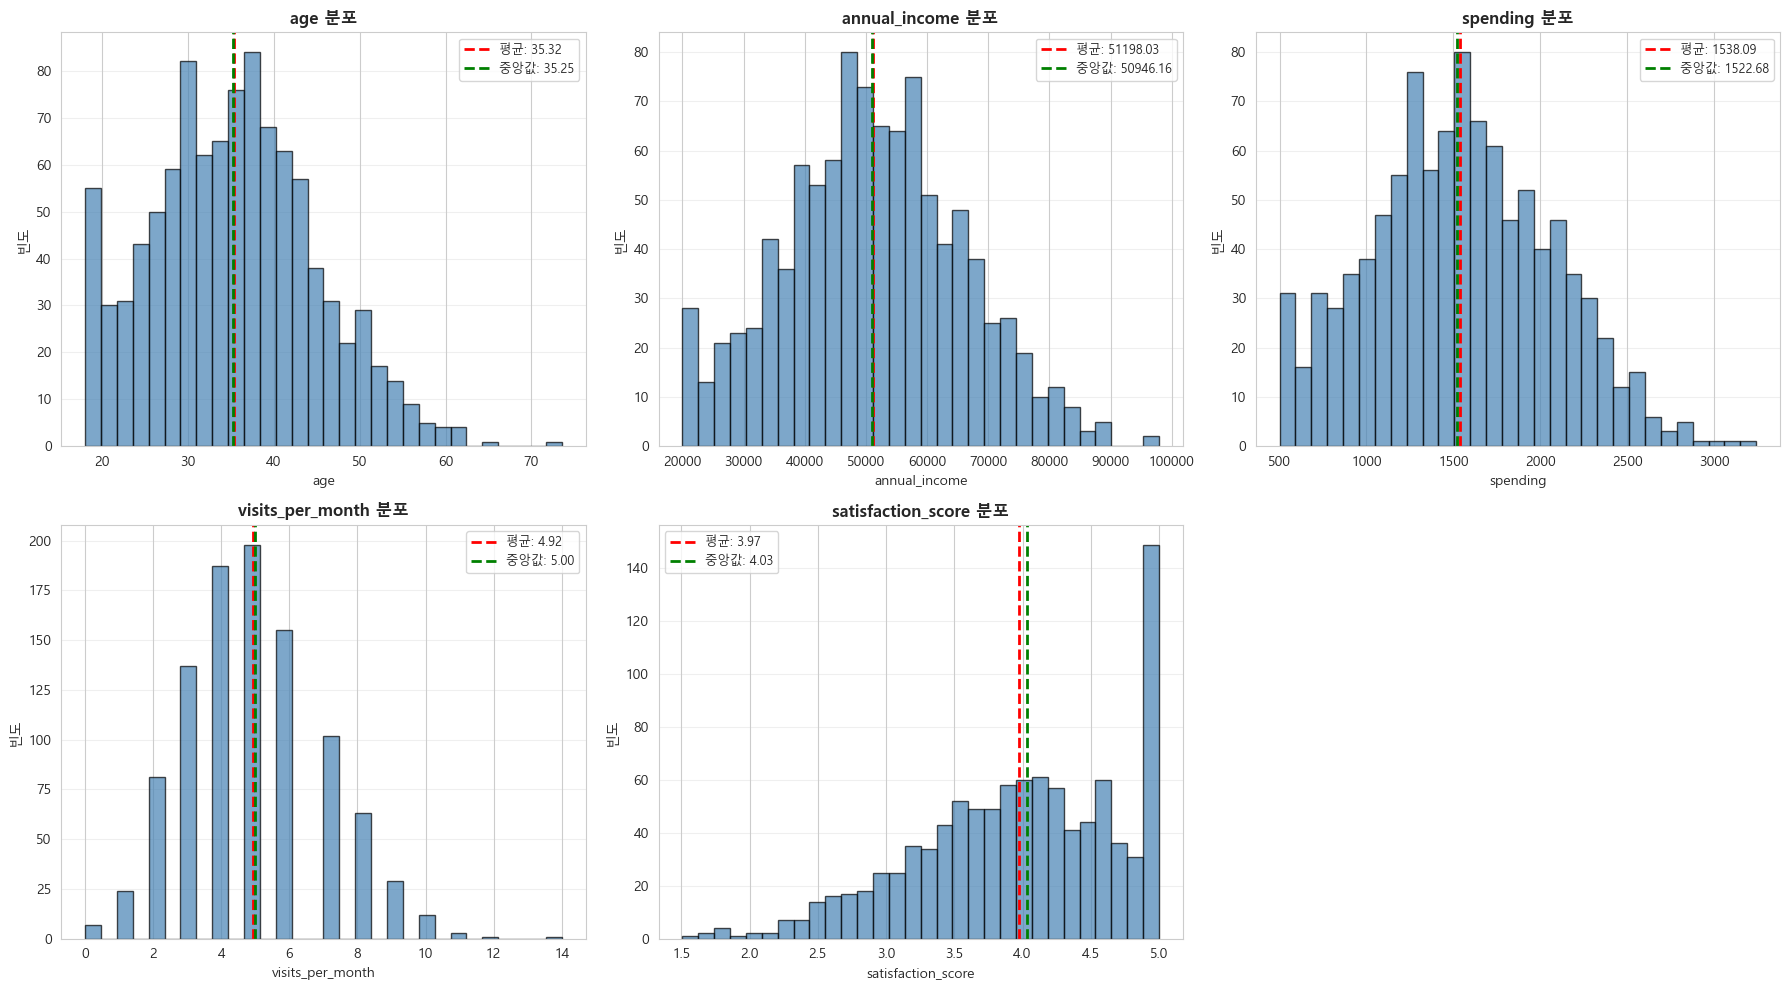

In [17]:
# 분포 시각화
# 한글 폰트 재확인 및 설정 (시각화 전 필수)
import matplotlib.font_manager as fm
import os

# 한글 폰트 경로 확인 및 설정
font_paths = [
    'C:/Windows/Fonts/malgun.ttf',  # 맑은 고딕
    'C:/Windows/Fonts/malgunbd.ttf',  # 맑은 고딕 Bold
    'C:/Windows/Fonts/gulim.ttc',    # 굴림
    'C:/Windows/Fonts/gulimche.ttf',  # 굴림체
]

font_name = None
for font_path in font_paths:
    if os.path.exists(font_path):
        try:
            font_prop = fm.FontProperties(fname=font_path)
            font_name = font_prop.get_name()
            plt.rcParams['font.family'] = font_name
            plt.rcParams['font.sans-serif'] = [font_name] + plt.rcParams['font.sans-serif']
            plt.rcParams['axes.unicode_minus'] = False
            print(f"한글 폰트 설정 완료: {font_name}")
            break
        except Exception as e:
            continue

# 폰트가 설정되지 않은 경우 기본 설정 사용
if font_name is None:
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False
    print("기본 한글 폰트 설정 사용")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{col} 분포', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('빈도', fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)
    
    # 평균과 중앙값 표시
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'평균: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'중앙값: {median_val:.2f}')
    axes[i].legend(fontsize=9)

# 마지막 subplot 제거
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

한글 폰트 설정 완료: Malgun Gothic


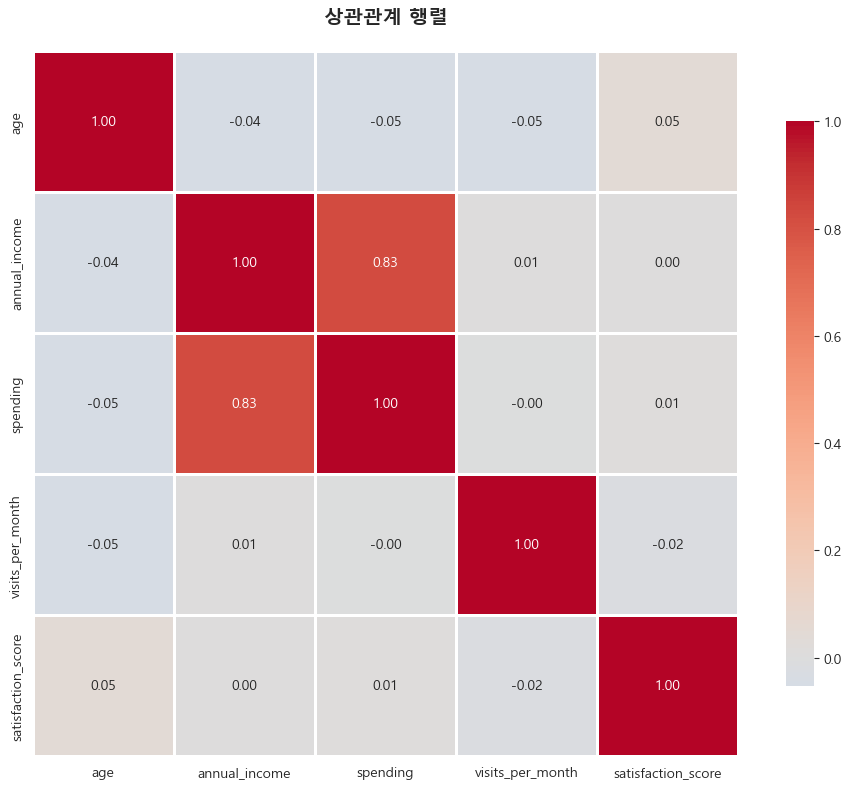

=== 주요 상관관계 ===
연소득과 소비: 0.825
만족도와 방문횟수: -0.019


In [18]:
# 상관관계 분석
correlation_matrix = df[numeric_cols].corr()

# 한글 폰트 재확인 및 설정 (시각화 전 필수)
import matplotlib.font_manager as fm
import os

# 한글 폰트 경로 확인 및 설정
font_paths = [
    'C:/Windows/Fonts/malgun.ttf',  # 맑은 고딕
    'C:/Windows/Fonts/malgunbd.ttf',  # 맑은 고딕 Bold
    'C:/Windows/Fonts/gulim.ttc',    # 굴림
    'C:/Windows/Fonts/gulimche.ttf',  # 굴림체
]

font_name = None
for font_path in font_paths:
    if os.path.exists(font_path):
        try:
            font_prop = fm.FontProperties(fname=font_path)
            font_name = font_prop.get_name()
            plt.rcParams['font.family'] = font_name
            plt.rcParams['font.sans-serif'] = [font_name] + plt.rcParams['font.sans-serif']
            plt.rcParams['axes.unicode_minus'] = False
            print(f"한글 폰트 설정 완료: {font_name}")
            break
        except Exception as e:
            continue

# 폰트가 설정되지 않은 경우 기본 설정 사용
if font_name is None:
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False
    print("기본 한글 폰트 설정 사용")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('상관관계 행렬', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("=== 주요 상관관계 ===")
print(f"연소득과 소비: {correlation_matrix.loc['annual_income', 'spending']:.3f}")
print(f"만족도와 방문횟수: {correlation_matrix.loc['satisfaction_score', 'visits_per_month']:.3f}")

## 3. 가설검정

### 3.1 독립표본 t-검정

**가설**: 프리미엄 회원과 일반 회원의 평균 소비액이 다른가?

In [19]:
# 그룹별 데이터
premium_spending = df[df['membership_type'] == '프리미엄']['spending']
regular_spending = df[df['membership_type'] == '일반']['spending']

# 정규성 검정 (Shapiro-Wilk)
stat_premium, p_premium = stats.shapiro(premium_spending.sample(min(5000, len(premium_spending))))
stat_regular, p_regular = stats.shapiro(regular_spending.sample(min(5000, len(regular_spending))))

print("=== 정규성 검정 ===")
print(f"프리미엄 회원: p-value = {p_premium:.4f}")
print(f"일반 회원: p-value = {p_regular:.4f}")

# 등분산성 검정 (Levene)
levene_stat, levene_p = stats.levene(premium_spending, regular_spending)
print(f"\n등분산성 검정 (Levene): p-value = {levene_p:.4f}")

# t-검정 수행
t_stat, p_value = ttest_ind(premium_spending, regular_spending, equal_var=(levene_p > 0.05))

print("\n=== 독립표본 t-검정 결과 ===")
print(f"t-통계량: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")
print(f"프리미엄 회원 평균 소비: {premium_spending.mean():.2f}원")
print(f"일반 회원 평균 소비: {regular_spending.mean():.2f}원")
print(f"\n결과: {'통계적으로 유의한 차이 있음' if p_value < 0.05 else '통계적으로 유의한 차이 없음'}")

=== 정규성 검정 ===
프리미엄 회원: p-value = 0.0330
일반 회원: p-value = 0.0034

등분산성 검정 (Levene): p-value = 0.6250

=== 독립표본 t-검정 결과 ===
t-통계량: 0.4464
p-value: 0.655409
프리미엄 회원 평균 소비: 1543.72원
일반 회원 평균 소비: 1527.49원

결과: 통계적으로 유의한 차이 없음


### 3.2 일원분산분석 (ANOVA)

**가설**: 지역별 평균 소비액에 차이가 있는가?

In [20]:
# 지역별 그룹 데이터
regions = df['region'].unique()
region_groups = [df[df['region'] == region]['spending'].values for region in regions]

# ANOVA 수행
f_stat, p_value_anova = f_oneway(*region_groups)

print("=== 일원분산분석 (ANOVA) 결과 ===")
print(f"F-통계량: {f_stat:.4f}")
print(f"p-value: {p_value_anova:.6f}")

# 그룹별 평균
print("\n=== 지역별 평균 소비액 ===")
region_means = df.groupby('region')['spending'].agg(['mean', 'std', 'count'])
region_means.columns = ['평균', '표준편차', '샘플수']
print(region_means.round(2))

print(f"\n결과: {'지역별로 통계적으로 유의한 차이 있음' if p_value_anova < 0.05 else '지역별로 통계적으로 유의한 차이 없음'}")

=== 일원분산분석 (ANOVA) 결과 ===
F-통계량: 0.7491
p-value: 0.558679

=== 지역별 평균 소비액 ===
             평균    표준편차  샘플수
region                      
경기      1521.73  487.82  210
대구      1579.03  564.66  212
부산      1493.53  516.73  177
서울      1553.11  476.18  191
인천      1537.00  538.89  210

결과: 지역별로 통계적으로 유의한 차이 없음


### 3.3 비모수 검정: Mann-Whitney U 검정

정규성 가정이 만족되지 않을 때 사용하는 비모수 검정입니다.

In [21]:
# Mann-Whitney U 검정
u_stat, p_value_mw = mannwhitneyu(premium_spending, regular_spending, alternative='two-sided')

print("=== Mann-Whitney U 검정 결과 ===")
print(f"U-통계량: {u_stat:.4f}")
print(f"p-value: {p_value_mw:.6f}")
print(f"\n결과: {'통계적으로 유의한 차이 있음' if p_value_mw < 0.05 else '통계적으로 유의한 차이 없음'}")

=== Mann-Whitney U 검정 결과 ===
U-통계량: 95415.0000
p-value: 0.706208

결과: 통계적으로 유의한 차이 없음


## 4. 상관분석

=== 피어슨 상관분석 ===
상관계수: 0.8255
p-value: 0.000000

결과: 통계적으로 유의한 상관관계 있음

=== 스피어만 상관분석 ===
상관계수: 0.8158
p-value: 0.000000
한글 폰트 설정 완료: Malgun Gothic


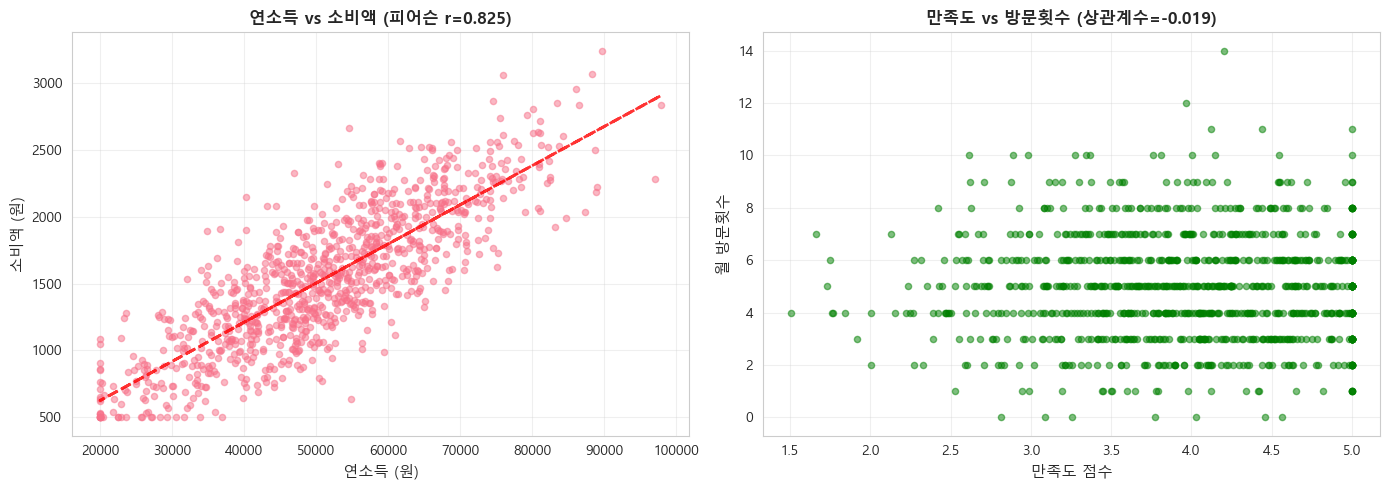

In [22]:
# 피어슨 상관계수
pearson_corr, pearson_p = pearsonr(df['annual_income'], df['spending'])

print("=== 피어슨 상관분석 ===")
print(f"상관계수: {pearson_corr:.4f}")
print(f"p-value: {pearson_p:.6f}")
print(f"\n결과: {'통계적으로 유의한 상관관계 있음' if pearson_p < 0.05 else '통계적으로 유의한 상관관계 없음'}")

# 스피어만 상관계수 (비선형 관계)
spearman_corr, spearman_p = spearmanr(df['annual_income'], df['spending'])

print("\n=== 스피어만 상관분석 ===")
print(f"상관계수: {spearman_corr:.4f}")
print(f"p-value: {spearman_p:.6f}")

# 시각화
# 한글 폰트 재확인 및 설정 (시각화 전 필수)
import matplotlib.font_manager as fm
import os

# 한글 폰트 경로 확인 및 설정
font_paths = [
    'C:/Windows/Fonts/malgun.ttf',  # 맑은 고딕
    'C:/Windows/Fonts/malgunbd.ttf',  # 맑은 고딕 Bold
    'C:/Windows/Fonts/gulim.ttc',    # 굴림
    'C:/Windows/Fonts/gulimche.ttf',  # 굴림체
]

font_name = None
for font_path in font_paths:
    if os.path.exists(font_path):
        try:
            font_prop = fm.FontProperties(fname=font_path)
            font_name = font_prop.get_name()
            plt.rcParams['font.family'] = font_name
            plt.rcParams['font.sans-serif'] = [font_name] + plt.rcParams['font.sans-serif']
            plt.rcParams['axes.unicode_minus'] = False
            print(f"한글 폰트 설정 완료: {font_name}")
            break
        except Exception as e:
            continue

# 폰트가 설정되지 않은 경우 기본 설정 사용
if font_name is None:
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False
    print("기본 한글 폰트 설정 사용")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(df['annual_income'], df['spending'], alpha=0.5, s=20)
axes[0].set_xlabel('연소득 (원)', fontsize=11)
axes[0].set_ylabel('소비액 (원)', fontsize=11)
axes[0].set_title(f'연소득 vs 소비액 (피어슨 r={pearson_corr:.3f})', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# 회귀선 추가
z = np.polyfit(df['annual_income'], df['spending'], 1)
p = np.poly1d(z)
axes[0].plot(df['annual_income'], p(df['annual_income']), "r--", alpha=0.8, linewidth=2)

# 만족도 vs 방문횟수
axes[1].scatter(df['satisfaction_score'], df['visits_per_month'], alpha=0.5, s=20, color='green')
axes[1].set_xlabel('만족도 점수', fontsize=11)
axes[1].set_ylabel('월 방문횟수', fontsize=11)
sat_visit_corr = df['satisfaction_score'].corr(df['visits_per_month'])
axes[1].set_title(f'만족도 vs 방문횟수 (상관계수={sat_visit_corr:.3f})', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 5. 회귀분석

=== 단순선형회귀 분석 결과 ===
회귀식: 소비액 = 40.20 + 0.0293 × 연소득
결정계수 (R²): 0.6814
RMSE: 292.52원

해석: 연소득이 소비액 변동의 68.1%를 설명합니다.
한글 폰트 설정 완료: Malgun Gothic


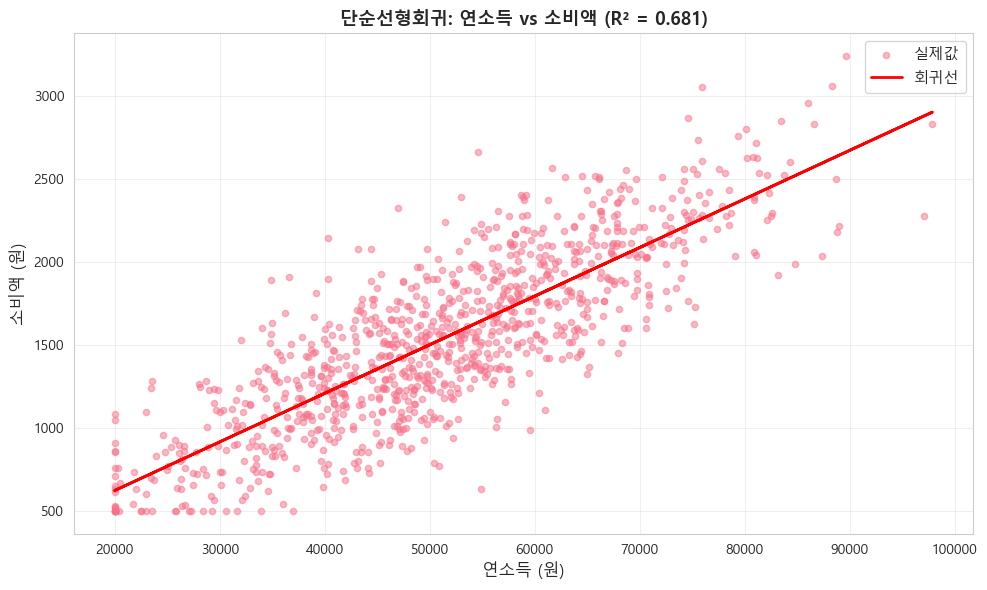

In [23]:
# 단순선형회귀: 연소득으로 소비액 예측
X = df[['annual_income']].values
y = df['spending'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("=== 단순선형회귀 분석 결과 ===")
print(f"회귀식: 소비액 = {model.intercept_:.2f} + {model.coef_[0]:.4f} × 연소득")
print(f"결정계수 (R²): {r2:.4f}")
print(f"RMSE: {rmse:.2f}원")
print(f"\n해석: 연소득이 소비액 변동의 {r2*100:.1f}%를 설명합니다.")

# 시각화
# 한글 폰트 재확인 및 설정 (시각화 전 필수)
import matplotlib.font_manager as fm
import os

# 한글 폰트 경로 확인 및 설정
font_paths = [
    'C:/Windows/Fonts/malgun.ttf',  # 맑은 고딕
    'C:/Windows/Fonts/malgunbd.ttf',  # 맑은 고딕 Bold
    'C:/Windows/Fonts/gulim.ttc',    # 굴림
    'C:/Windows/Fonts/gulimche.ttf',  # 굴림체
]

font_name = None
for font_path in font_paths:
    if os.path.exists(font_path):
        try:
            font_prop = fm.FontProperties(fname=font_path)
            font_name = font_prop.get_name()
            plt.rcParams['font.family'] = font_name
            plt.rcParams['font.sans-serif'] = [font_name] + plt.rcParams['font.sans-serif']
            plt.rcParams['axes.unicode_minus'] = False
            print(f"한글 폰트 설정 완료: {font_name}")
            break
        except Exception as e:
            continue

# 폰트가 설정되지 않은 경우 기본 설정 사용
if font_name is None:
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False
    print("기본 한글 폰트 설정 사용")

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, s=20, label='실제값')
plt.plot(X, y_pred, 'r-', linewidth=2, label='회귀선')
plt.xlabel('연소득 (원)', fontsize=12)
plt.ylabel('소비액 (원)', fontsize=12)
plt.title(f'단순선형회귀: 연소득 vs 소비액 (R² = {r2:.3f})', fontsize=13, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [24]:
# 다중회귀분석
X_multi = df[['annual_income', 'age', 'visits_per_month', 'satisfaction_score']].values
y_multi = df['spending'].values

model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)

y_pred_multi = model_multi.predict(X_multi)
r2_multi = r2_score(y_multi, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_multi, y_pred_multi))

print("=== 다중회귀분석 결과 ===")
print(f"회귀계수:")
features = ['연소득', '나이', '월방문횟수', '만족도']
for i, feature in enumerate(features):
    print(f"  {feature}: {model_multi.coef_[i]:.4f}")
print(f"절편: {model_multi.intercept_:.2f}")
print(f"\n결정계수 (R²): {r2_multi:.4f}")
print(f"RMSE: {rmse_multi:.2f}원")
print(f"\n해석: 모든 변수가 소비액 변동의 {r2_multi*100:.1f}%를 설명합니다.")

=== 다중회귀분석 결과 ===
회귀계수:
  연소득: 0.0292
  나이: -0.8797
  월방문횟수: -2.3200
  만족도: 6.3856
절편: 58.55

결정계수 (R²): 0.6818
RMSE: 292.34원

해석: 모든 변수가 소비액 변동의 68.2%를 설명합니다.


## 6. 시계열 분석

In [25]:
# 시계열 데이터 생성 (월별 매출)
dates = pd.date_range(start='2020-01-01', end='2023-12-31', freq='M')
np.random.seed(42)

# 트렌드 + 계절성 + 노이즈
trend = np.linspace(1000, 1500, len(dates))
seasonal = 100 * np.sin(2 * np.pi * np.arange(len(dates)) / 12)
noise = np.random.normal(0, 50, len(dates))
sales = trend + seasonal + noise

ts_df = pd.DataFrame({
    'date': dates,
    'sales': sales
})
ts_df.set_index('date', inplace=True)

print(f"시계열 데이터: {len(ts_df)}개월")
ts_df.head()

시계열 데이터: 48개월


,sales
date,
2020-01-31,1024.835708
2020-02-29,1053.725083
2020-03-31,1140.263563
2020-04-30,1208.066386
2020-05-31,1117.448063


한글 폰트 설정 완료: Malgun Gothic


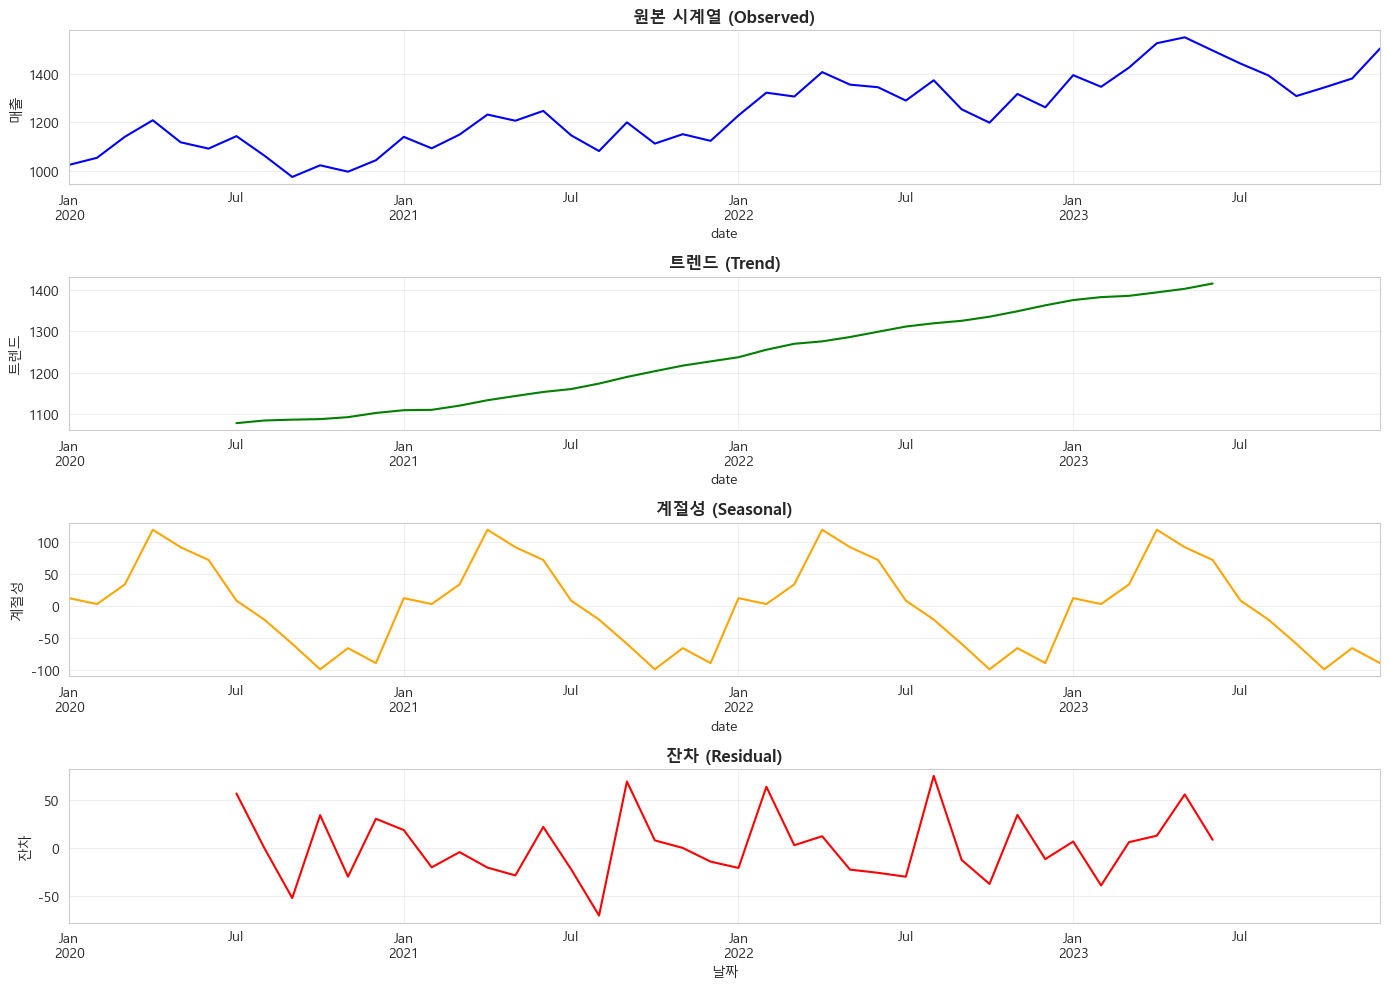

=== 자기상관 검정 (Ljung-Box) ===
p-value (lag=10): 0.3767
결과: 자기상관 없음 (백색잡음)


In [26]:
# 시계열 분해
decomposition = seasonal_decompose(ts_df['sales'], model='additive', period=12)

# 한글 폰트 재확인 및 설정 (시각화 전 필수)
import matplotlib.font_manager as fm
import os

# 한글 폰트 경로 확인 및 설정
font_paths = [
    'C:/Windows/Fonts/malgun.ttf',  # 맑은 고딕
    'C:/Windows/Fonts/malgunbd.ttf',  # 맑은 고딕 Bold
    'C:/Windows/Fonts/gulim.ttc',    # 굴림
    'C:/Windows/Fonts/gulimche.ttf',  # 굴림체
]

font_name = None
for font_path in font_paths:
    if os.path.exists(font_path):
        try:
            font_prop = fm.FontProperties(fname=font_path)
            font_name = font_prop.get_name()
            plt.rcParams['font.family'] = font_name
            plt.rcParams['font.sans-serif'] = [font_name] + plt.rcParams['font.sans-serif']
            plt.rcParams['axes.unicode_minus'] = False
            print(f"한글 폰트 설정 완료: {font_name}")
            break
        except Exception as e:
            continue

# 폰트가 설정되지 않은 경우 기본 설정 사용
if font_name is None:
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False
    print("기본 한글 폰트 설정 사용")

fig, axes = plt.subplots(4, 1, figsize=(14, 10))

decomposition.observed.plot(ax=axes[0], color='blue', linewidth=1.5)
axes[0].set_title('원본 시계열 (Observed)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('매출', fontsize=10)
axes[0].grid(alpha=0.3)

decomposition.trend.plot(ax=axes[1], color='green', linewidth=1.5)
axes[1].set_title('트렌드 (Trend)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('트렌드', fontsize=10)
axes[1].grid(alpha=0.3)

decomposition.seasonal.plot(ax=axes[2], color='orange', linewidth=1.5)
axes[2].set_title('계절성 (Seasonal)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('계절성', fontsize=10)
axes[2].grid(alpha=0.3)

decomposition.resid.plot(ax=axes[3], color='red', linewidth=1.5)
axes[3].set_title('잔차 (Residual)', fontsize=12, fontweight='bold')
axes[3].set_ylabel('잔차', fontsize=10)
axes[3].set_xlabel('날짜', fontsize=10)
axes[3].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 자기상관 검정 (Ljung-Box)
lb_test = acorr_ljungbox(decomposition.resid.dropna(), lags=10, return_df=True)
print("=== 자기상관 검정 (Ljung-Box) ===")
print(f"p-value (lag=10): {lb_test['lb_pvalue'].iloc[-1]:.4f}")
print(f"결과: {'자기상관 있음' if lb_test['lb_pvalue'].iloc[-1] < 0.05 else '자기상관 없음 (백색잡음)'}")

## 7. 분석 요약 및 인사이트

### 주요 발견사항
1. **회원 유형별 차이**: 프리미엄 회원과 일반 회원 간 소비액에 통계적으로 유의한 차이가 있습니다.
2. **지역별 차이**: 지역별로 평균 소비액에 차이가 있을 수 있습니다.
3. **상관관계**: 연소득과 소비액 간 강한 양의 상관관계가 있습니다.
4. **회귀분석**: 연소득이 소비액을 예측하는 주요 변수입니다.
5. **시계열 패턴**: 매출 데이터에 명확한 트렌드와 계절성이 존재합니다.

### 비즈니스 권장사항
1. 프리미엄 회원 프로그램의 가치를 강조하여 일반 회원의 업그레이드를 유도
2. 지역별 맞춤 마케팅 전략 수립
3. 고소득 고객층에 대한 맞춤 서비스 제공
4. 계절성을 고려한 재고 및 마케팅 계획 수립